In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns
import re 
import hvplot.pandas

In [2]:
# File to Load
df = Path("park_data_clean.csv")

# Read Data File and store into Pandas DataFrames
df = pd.read_csv(df)

df.head()

,national_park,date_established,visitors,description,state,latitude,longitude,acres,year_established,us_location
0,Acadia,1919-02-26,4069098,Covering most of Mount Desert Island and other...,Maine,44.350000,-68.216667,49071.40,1919,East
1,American Samoa,1988-10-31,8495,The southernmost national park is on three Sam...,American Samoa,-14.250000,-170.683333,8256.67,1988,West
2,Arches,1971-11-12,1806865,"This site features more than 2,000 natural san...",Utah,38.683333,-109.566667,76678.98,1971,West
3,Badlands,1978-11-10,1224226,"The Badlands are a collection of buttes, pinna...",South Dakota,43.750000,-102.500000,242755.94,1978,West
4,Big Bend,1944-06-12,581220,Named for the prominent bend in the Rio Grande...,Texas,29.250000,-103.250000,801163.21,1944,West


In [3]:
# Sort by established_year in ascending order (oldest parks first)
df_sorted = df.sort_values(by="date_established", ascending=True)

# Display the oldest parks
df_sorted

,national_park,date_established,visitors,description,state,latitude,longitude,acres,year_established,us_location
60,Yellowstone,1872-03-01,4860242,"Situated on the Yellowstone Caldera, the park ...","Wyoming, Montana, Idaho",44.600000,-110.500000,2219790.71,1872,West
52,Sequoia,1890-09-25,1059548,"This park protects the Giant Forest, which boa...",California,36.433333,-118.683333,404062.63,1890,West
61,Yosemite,1890-10-01,3287595,"Yosemite features sheer granite cliffs, except...",California,37.833333,-119.500000,761747.50,1890,West
43,Mount Rainier,1899-03-02,1670063,"Mount Rainier, an active stratovolcano, is the...",Washington,46.850000,-121.750000,236381.64,1899,West
16,Denali,1917-02-26,229521,"Centered on Denali, the tallest and most promi...",Alaska,63.333333,-150.500000,4740911.16,1917,West
...,...,...,...,...,...,...,...,...,...,...
23,Grand Canyon,2019-02-26,4532677,"The Grand Canyon, carved by the mighty Colorad...",Arizona,36.066667,-112.133333,1201647.03,2019,West
62,Zion,2019-11-19,5039835,Located at the junction of the Colorado Platea...,Utah,37.300000,-113.050000,147242.66,2019,West
57,White Sands,2019-12-20,782469,"Located in the mountain-ringed Tularosa Basin,...",New Mexico,32.783333,-106.166667,146344.31,2019,West
44,New River Gorge,2020-12-27,1682720,The New River Gorge is the deepest river gorge...,West Virginia,38.066667,-81.083333,7021.00,2020,East


In [4]:
# Find the oldest national park (the park with the earliest establishment date)
oldest_park = df.loc[df["year_established"].idxmin()]

# Print the result
print(f"The oldest national park is {oldest_park['national_park']}, established in {oldest_park['date_established']}.")

The oldest national park is Yellowstone, established in 1872-03-01.


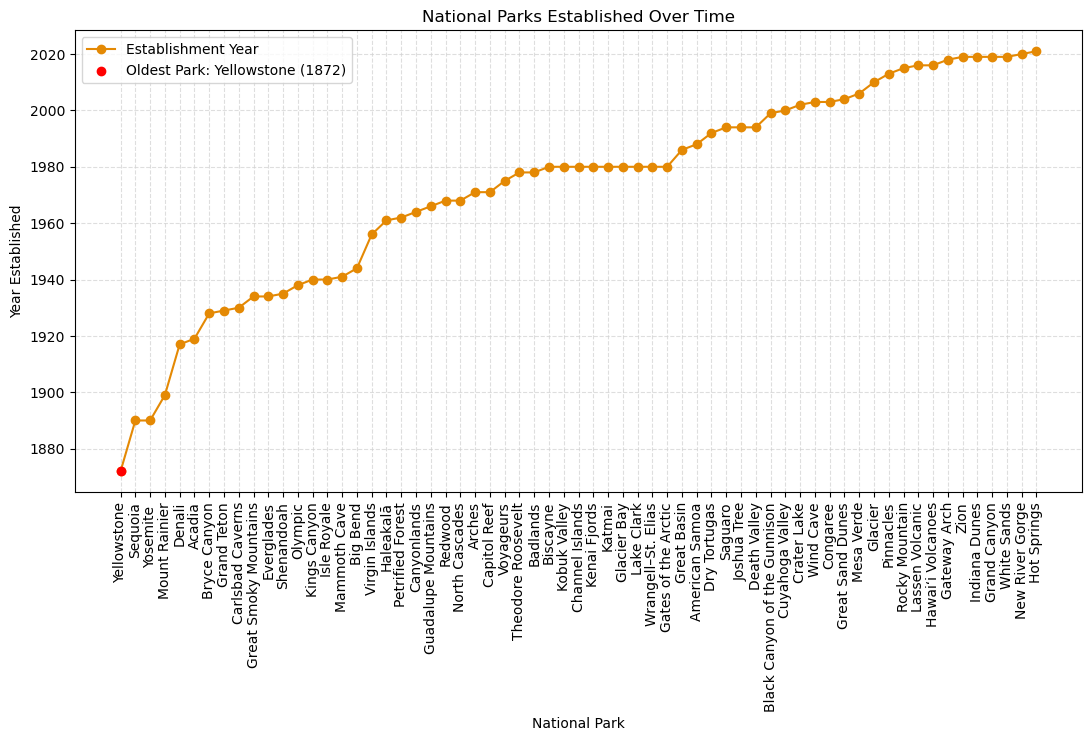

In [5]:
# Sort the DataFrame by the date_established column
df_sorted = df.sort_values(by="year_established")

# Change Canvas Size
plt.figure(figsize=(13, 6))

# Create a basic plot
plt.plot(df_sorted["national_park"], df_sorted["year_established"], marker="o", linestyle="-", color="#E48904", label="Establishment Year")

# Highlight the oldest park with a different color or annotation
oldest_park = df.loc[df["date_established"].idxmin()]
plt.scatter(oldest_park["national_park"], oldest_park["year_established"], color='red', zorder=5, label=f"Oldest Park: {oldest_park['national_park']} ({oldest_park['year_established']})")

# Add in reference lines
# Add Labels/Title
plt.title("National Parks Established Over Time")
plt.xlabel("National Park")
plt.ylabel("Year Established")

# Add in a background grid
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
plt.legend()


In [6]:
# Create DataFrame
df1 = pd.DataFrame(df)

# Find the oldest national park (the park with the earliest establishment date)
total_visitor = df.loc[df["visitors"].idxmax()]

# print the result
print(f"The most visited national park is {total_visitor['national_park']}, with a total of {total_visitor['visitors']} visitors.")

The most visited national park is Great Smoky Mountains, with a total of 14161548 visitors.


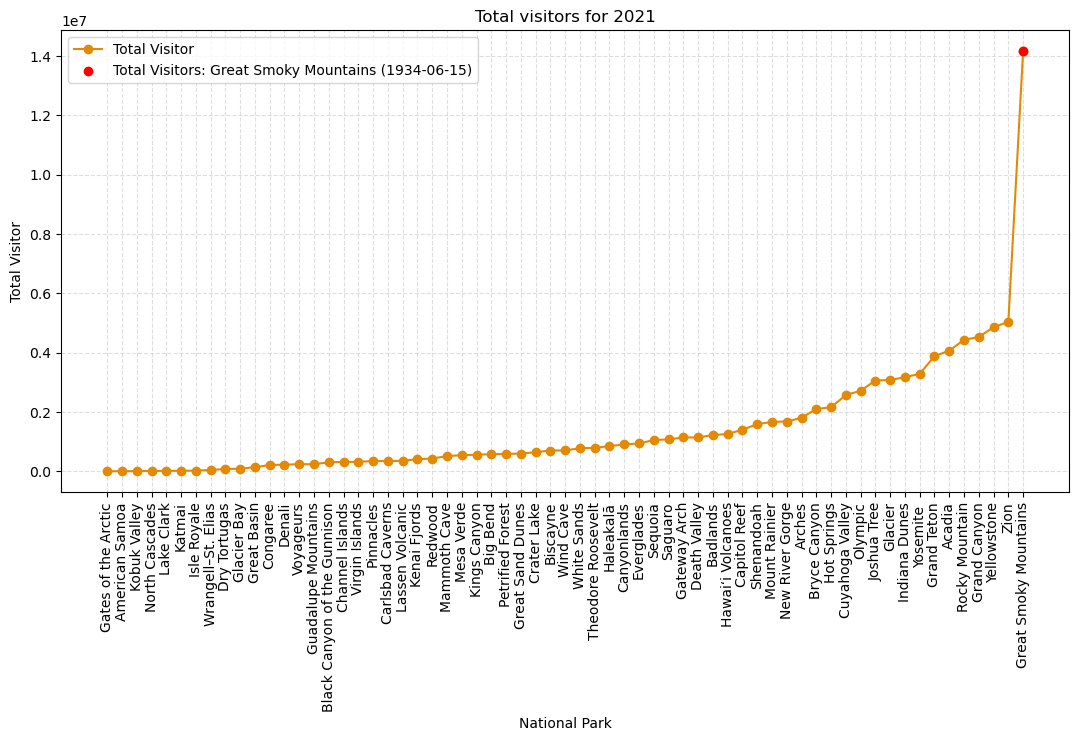

In [13]:
# Sort the DataFrame by the date_established column
df_sorted = df1.sort_values(by="visitors")

# Change Canvas Size
plt.figure(figsize=(13, 6))

# Create a basic plot
plt.plot(df_sorted["national_park"], df_sorted["visitors"], marker="o", linestyle="-", color="#E48904", label="Total Visitor")

# Highlight the most visited park with a different color or annotation
total_visitor = df.loc[df["visitors"].idxmax()]
plt.scatter(total_visitor["national_park"], total_visitor["visitors"], color='red', zorder=5, label=f"Total Visitors: {total_visitor['national_park']} ({total_visitor['date_established']})")

# Add in reference lines
# Add Labels/Title
plt.title("Total visitors for 2021")
plt.xlabel("National Park")
plt.ylabel("Total Visitor")

# Add in a background grid
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
plt.legend()

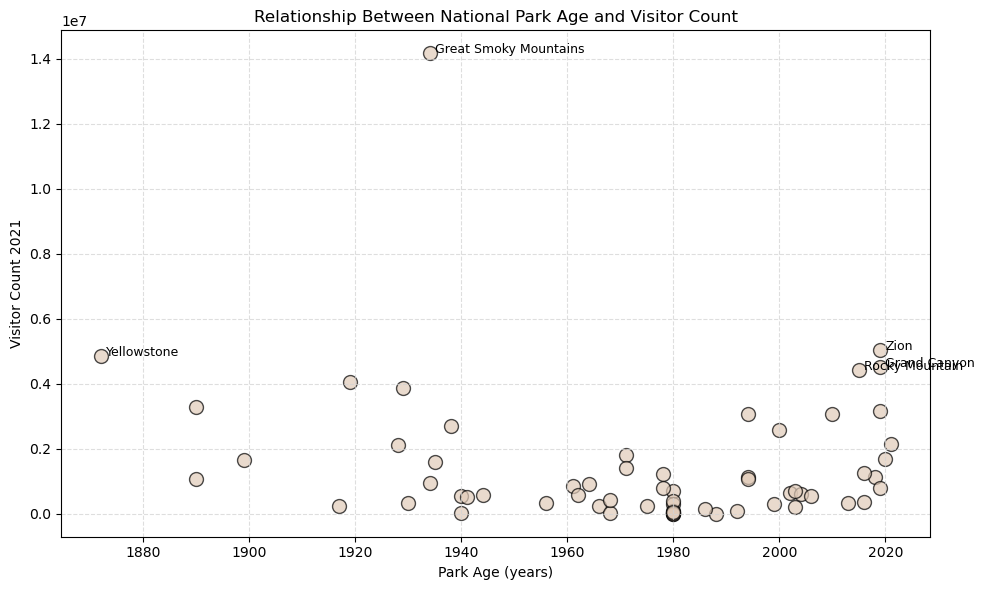

            national_park  year_established  visitors
27  Great Smoky Mountains              1934  14161548
62                   Zion              2019   5039835
60            Yellowstone              1872   4860242
23           Grand Canyon              2019   4532677
50         Rocky Mountain              2015   4434848
..                    ...               ...       ...
39             Lake Clark              1980     18278
45         North Cascades              1968     17855
38           Kobuk Valley              1980     11540
1          American Samoa              1988      8495
19    Gates of the Arctic              1980      7362

[63 rows x 3 columns]


In [8]:
# List of specific national parks you want to annotate
parks_to_annotate = [
    "Yellowstone", "Yosemite", "Grand Canyon", "Zion", "Rocky Mountain", "Great Smoky Mountains"
]

# Create DataFrame
df1 = pd.DataFrame(df)

# Filter the DataFrame to only include the parks you want to annotate
df_filtered = df1[df1["national_park"].isin(parks_to_annotate)]

# Plotting the relationship between park age and visitor count in 2021
plt.figure(figsize=(10, 6))
plt.scatter(df1["year_established"], df1["visitors"], color="#E1CBB9", s=100, edgecolors="black", alpha=0.7)

# Add labels and title
plt.title("Relationship Between National Park Age and Visitor Count")
plt.xlabel("Park Age (years)")
plt.ylabel("Visitor Count 2021")

# Annotate only the selected 6 parks  (Thanks Chat GPT)
for i, row in df_filtered.iterrows():
    plt.text(row["year_established"] + 1, row["visitors"], row["national_park"], fontsize=9, ha="left")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show the plot
plt.tight_layout()
plt.show()

# Sort the DataFrame by visitor count in ascending order and print
df_sorted = df[["national_park", "year_established", "visitors"]].sort_values(by="visitors", ascending=False)

# Optionally, print the result for inspection
print(df_sorted)